<a href="https://colab.research.google.com/github/m-atique/deeplearning-assignment/blob/main/inospeher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
uploded = files.upload()

Saving ionosphere_data.csv to ionosphere_data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploded['ionosphere_data.csv']))

In [ ]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
df.shape

(351, 34)

In [ ]:
np.where(df['label'] == 'b') # labels are not in continious manner so need to shuffle

(array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
         27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
         53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
         79,  81,  83,  85,  87,  89,  91,  93,  95,  98, 100, 102, 104,
        106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
        132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
        158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
        184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208,
        210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234,
        236, 238, 240, 242, 244, 246, 248, 250, 252]),)

In [ ]:
df.isnull().sum()  # No null  value

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
labels = df['label']

In [ ]:
labels = pd.get_dummies(labels)

In [ ]:
labels.head

<bound method NDFrame.head of      b  g
0    0  1
1    1  0
2    0  1
3    1  0
4    0  1
..  .. ..
346  0  1
347  0  1
348  0  1
349  0  1
350  0  1

[351 rows x 2 columns]>

In [ ]:
df.drop(columns = 'label', inplace = True)

In [ ]:
df.shape

(351, 34)

In [ ]:
train_data = df[:211]
train_labels = labels[:211]
#--------------------------------------
test_data =df[211:]
test_labels= labels[211:]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_test = le.transform(y_test)
    return y_train, y_test

In [ ]:
train_labels ,test_labels = prepare_targets(train_labels,test_labels)

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation= 'relu'))
model.add(layers.Dense(1,activation= 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_data,train_labels,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.7264 - accuracy: 0.5334
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.5991
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6285
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7155
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7459
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7881
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8508
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8378
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.8388
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.8590
Epoch 11/100
7/7 [===========

In [ ]:
history =model.history.history

In [ ]:
model.evaluate(test_data,test_labels)

5/5 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9786


[0.07969256490468979, 0.9785714149475098]

In [ ]:
model.predict(test_data)

array([[8.8879859e-01],
       [1.4864504e-03],
       [9.8760056e-01],
       [1.5866220e-02],
       [9.9967945e-01],
       [9.7146308e-01],
       [9.8388332e-01],
       [1.8371046e-03],
       [6.6475838e-01],
       [1.1125231e-11],
       [8.8632298e-01],
       [1.4848232e-02],
       [9.3006885e-01],
       [1.7722075e-05],
       [8.4371495e-01],
       [4.4482946e-04],
       [9.9970162e-01],
       [6.3358093e-05],
       [9.8443693e-01],
       [2.0809263e-02],
       [9.9909651e-01],
       [1.4552474e-04],
       [9.8836732e-01],
       [3.3574402e-01],
       [9.0934193e-01],
       [5.5847138e-01],
       [9.7884524e-01],
       [3.8679093e-02],
       [9.8801261e-01],
       [3.2447875e-03],
       [9.9489307e-01],
       [6.9894493e-03],
       [9.9587154e-01],
       [6.9117546e-04],
       [9.9450713e-01],
       [8.5193813e-03],
       [9.3361938e-01],
       [9.0166926e-04],
       [9.9987781e-01],
       [3.9589895e-06],
       [9.9955368e-01],
       [2.076506

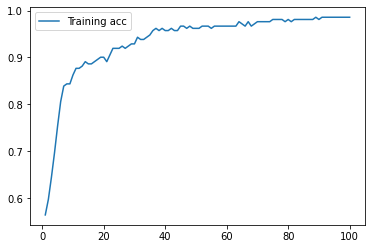

In [ ]:
train_acc = history['accuracy']
train_loss = history['loss']
epoches =range(1,len(train_acc)+1)
plt.plot(epoches,train_acc,label='Training acc')

plt.legend()
plt.show()

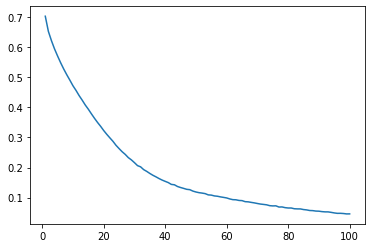

In [ ]:
plt.plot(epoches,train_loss,label = 'Training loss')